In [6]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier(n_jobs=1)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()


99.94916115912558% of samples were classified correctly !


In [15]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./data.pickle', 'rb'))

data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

model = RandomForestClassifier(n_jobs=4)

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()


KeyboardInterrupt: 

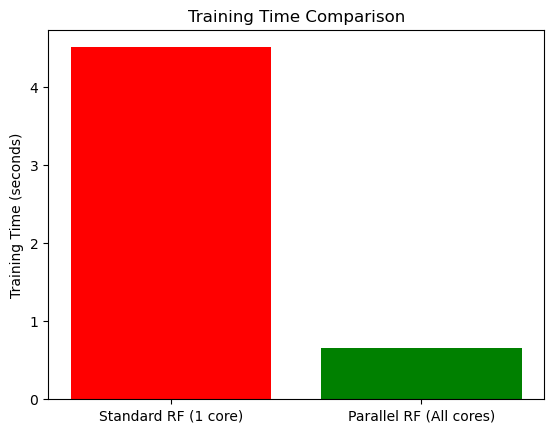

4.50384783744812 0.6604750156402588


In [7]:
import time
import matplotlib.pyplot as plt

# Function to train a model and return training time
def train_model(n_jobs_value):
    model = RandomForestClassifier(n_jobs=n_jobs_value)
    start_time = time.time()
    model.fit(x_train, y_train)
    return time.time() - start_time

# Time training for standard vs. parallel RF
time_standard = train_model(n_jobs_value=1)  # No parallelism
time_parallel = train_model(n_jobs_value=-1)  # Use all cores

# Plot the results
labels = ['Standard RF (1 core)', 'Parallel RF (All cores)']
times = [time_standard, time_parallel]

plt.bar(labels, times, color=['red', 'green'])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()
print(time_standard, time_parallel)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time
import matplotlib.pyplot as plt



In [57]:
# Function to train a model and return training time
def train_model(n_jobs_value):
    model = RandomForestClassifier(n_jobs=n_jobs_value)
    start_time = time.time()
    model.fit(x_train, y_train)
    return time.time() - start_time

time_rf = train_model(n_jobs_value= -1)  # Use all cores


In [55]:
# Function to train a model and return training time


def train_model_lr(n_jobs_value):
    model = LogisticRegression(n_jobs=n_jobs_value)
    start_time = time.time()
    model.fit(x_train, y_train)
    return time.time() - start_time

time_lr = train_model_lr(n_jobs_value= -1)

In [31]:


def train_model_svc():
    model = SVC()
    start_time = time.time()
    model.fit(x_train, y_train)
    return time.time() - start_time

time_svc = train_model_svc()



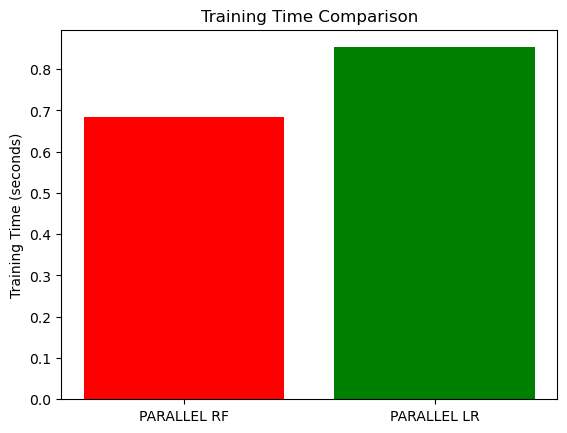

0.6829030513763428 0.8528239727020264


In [59]:



# Plot the results
labels = ['PARALLEL RF', 'PARALLEL LR']
times = [time_rf,time_lr]

plt.bar(labels, times, color=['red', 'green'])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()
print(time_rf, time_lr)

0.9994916115912558
0.9989832231825114


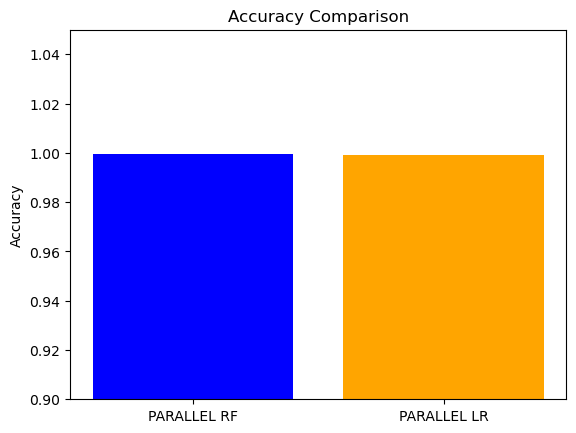

In [62]:
# Train both models and compare accuracy
model_rf = RandomForestClassifier(n_jobs=-1).fit(x_train, y_train)
model_lr = LogisticRegression(n_jobs=-1).fit(x_train, y_train)

acc_rf = accuracy_score(y_test, model_rf.predict(x_test))
acc_lr = accuracy_score(y_test, model_lr.predict(x_test))
print(acc_rf)
print(acc_lr)
# Plot accuracy
plt.bar(['PARALLEL RF', 'PARALLEL LR'], [acc_rf, acc_lr], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05)  # Set y-axis limits for clarity
plt.title('Accuracy Comparison')
plt.show()

0.9994916115912558
0.9989832231825114


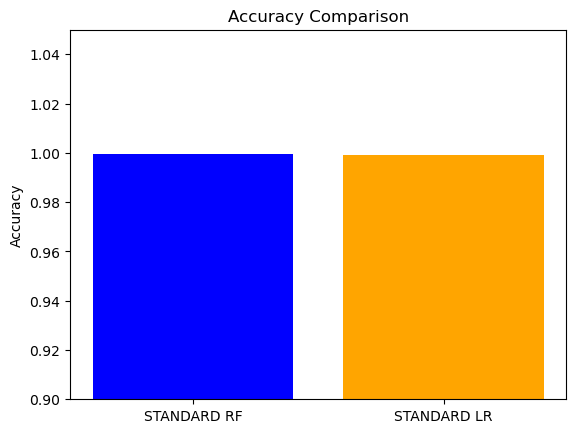

In [63]:
# Train both models and compare accuracy
model_rf = RandomForestClassifier(n_jobs=1).fit(x_train, y_train)
model_lr = LogisticRegression(n_jobs=1).fit(x_train, y_train)

acc_rf = accuracy_score(y_test, model_rf.predict(x_test))
acc_lr = accuracy_score(y_test, model_lr.predict(x_test))
print(acc_rf)
print(acc_lr)
# Plot accuracy
plt.bar(['STANDARD RF', 'STANDARD LR'], [acc_rf, acc_lr], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05)  # Set y-axis limits for clarity
plt.title('Accuracy Comparison')
plt.show()

TIME TAKEN BY 1 core: 4.479027032852173 s
TIME TAKEN BY 2 core: 2.2572450637817383 s
TIME TAKEN BY 4 core: 1.2300682067871094 s
TIME TAKEN BY 8 core: 0.6967449188232422 s


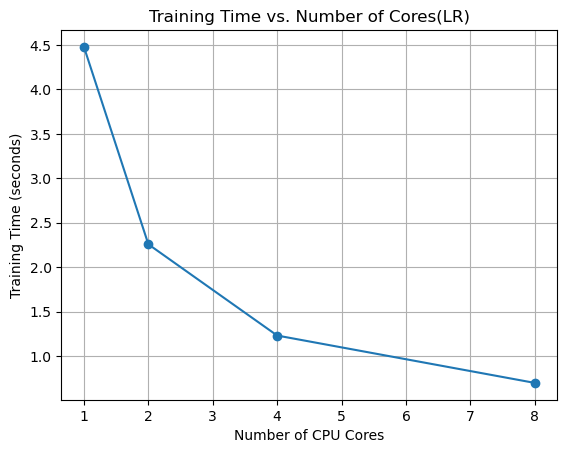

In [ ]:
# RF
cores = [1, 2, 4, 8]  # Adjust based on your CPU
times = []

for n in cores:
    time_taken = train_model(n_jobs_value=n)
    times.append(time_taken)
    print('TIME TAKEN BY {} core: {} s'.format(n, time_taken))

plt.plot(cores, times, marker='o')
plt.xlabel('Number of CPU Cores')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Cores(RF)')
plt.grid(True)
plt.show()

TIME TAKEN BY 1 core: 0.5636029243469238 s
TIME TAKEN BY 2 core: 2.1335742473602295 s
TIME TAKEN BY 4 core: 2.133082866668701 s
TIME TAKEN BY 8 core: 2.9897420406341553 s


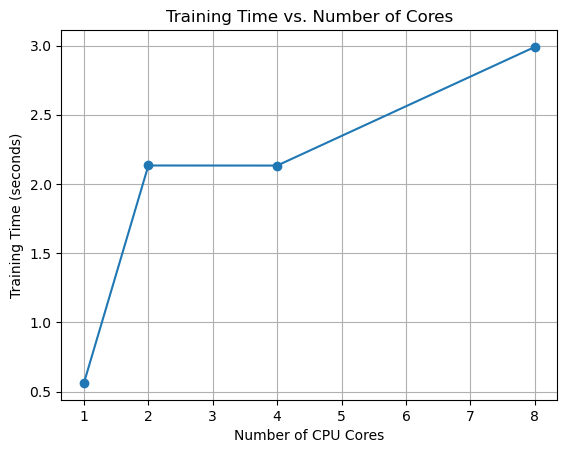

In [64]:
# LR
cores = [1, 2, 4, 8]  # Adjust based on your CPU
times = []

for n in cores:
    time_taken = train_model_lr(n_jobs_value=n)
    times.append(time_taken)
    print('TIME TAKEN BY {} core: {} s'.format(n, time_taken))

plt.plot(cores, times, marker='o')
plt.xlabel('Number of CPU Cores')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of Cores')
plt.grid(True)
plt.show()

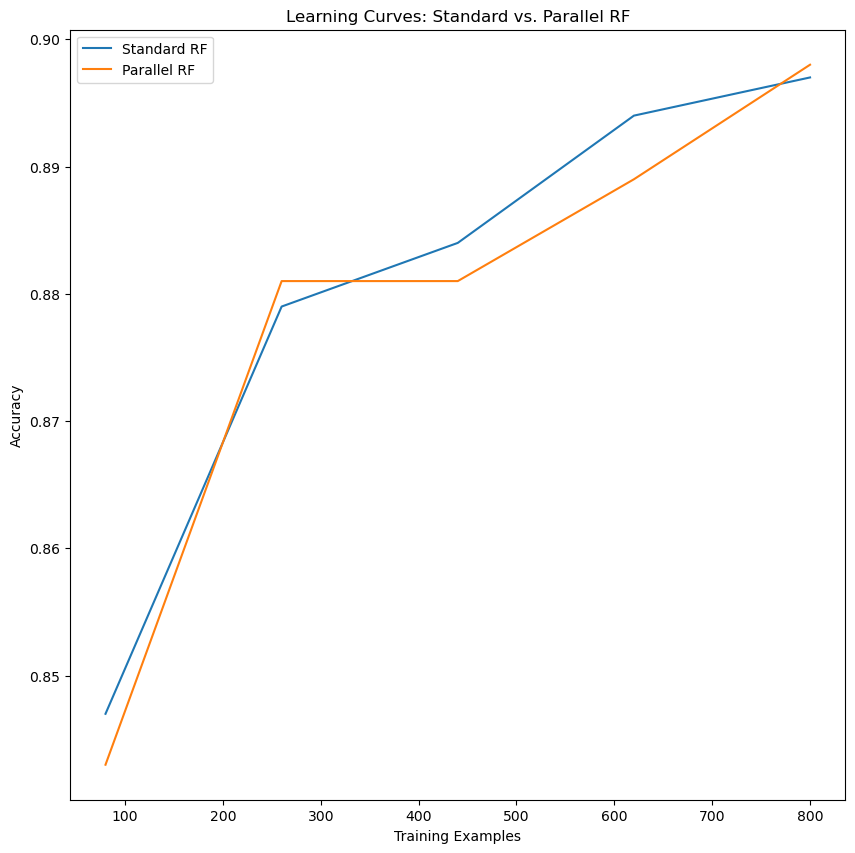

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification

# Create example dataset
data, labels = make_classification(n_samples=1000, n_features=20, random_state=42)

def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, data, labels, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
    )
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=title)

# Compare learning curves
plt.figure(figsize=(10, 10))
plot_learning_curve(RandomForestClassifier(n_jobs=1), 'Standard RF')
plot_learning_curve(RandomForestClassifier(n_jobs=-1), 'Parallel RF')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Standard vs. Parallel RF')
plt.legend()
plt.show()


#dataset


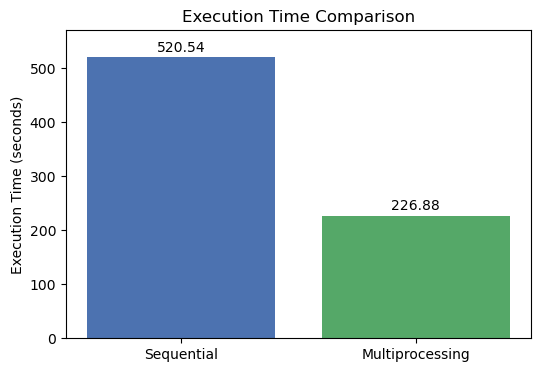

In [66]:
import matplotlib.pyplot as plt

# Example execution times in seconds (replace these with your actual measurements)
# For example, these values are taken from an observed output:
# Sequential execution: ~232.95 seconds
# Multiprocessing execution: ~307.91 seconds
methods = ['Sequential', 'Multiprocessing']
times = [520.5448739528656, 226.8788402080536]

plt.figure(figsize=(6, 4))
bars = plt.bar(methods, times, color=['#4c72b0', '#55a868'])

plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')

# Annotate each bar with its height (time)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0, max(times) + 50)
plt.show()


Simplicity (Normalized Maintainability Index): 0.95
Parallel Speedup (T_seq/T_parallel): 2.29
Parallel Efficiency (Speedup/p): 0.29
Error Handling Efficiency (Successful/Total): 1.00
Scalability Metrics (for each processor count):
   1 processors: Speedup =  1.00, Efficiency =  1.00
   8 processors: Speedup =  2.29, Efficiency =  0.29
Overhead Efficiency (T_useful/T_total): 0.80
     1 processors: Speedup =  1.00, Efficiency =  1.00
     8 processors: Speedup =  2.29, Efficiency =  0.29


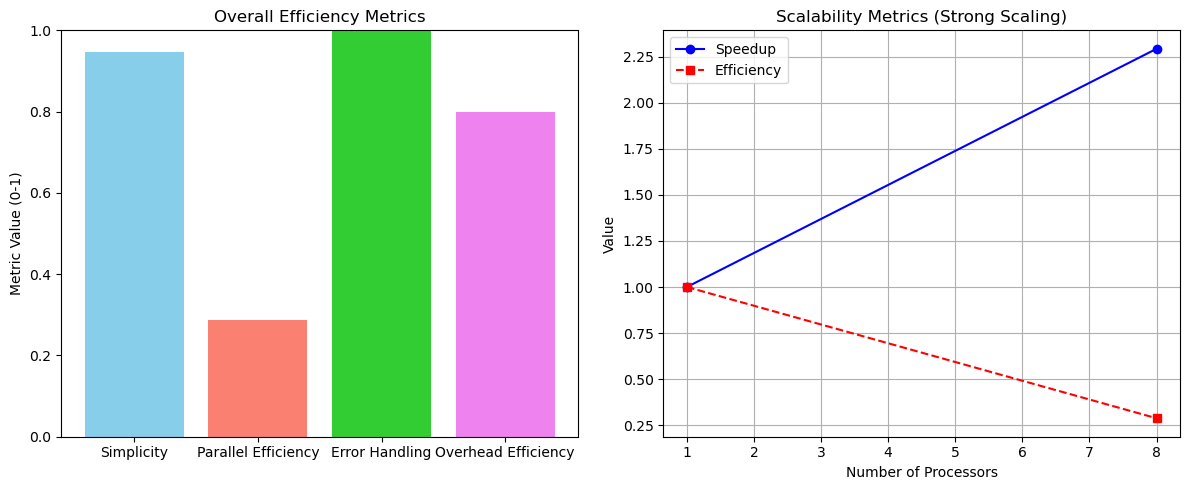

In [ ]:
#!/usr/bin/env python3
"""
This script computes a set of performance metrics for a parallel image‐processing pipeline:
  1. Simplicity (via maintainability index as a proxy)
  2. Parallel Efficiency
  3. Error Handling Efficiency
  4. Scalability (via strong scaling efficiency over different processor counts)
  5. Overhead Efficiency

For simplicity, many of these metrics are computed from provided (or measured) numeric data.
"""
!pip3 install radon
import sys
import matplotlib.pyplot as plt

# -------------------------------
# Metric 1: Simplicity
# -------------------------------
def compute_simplicity(filename):
    """
    Compute a simplicity metric using the maintainability index (MI) from radon.
    MI is typically in a 0-100 range, with higher values indicating more maintainable (simpler) code.
    The value is normalized to 0-1.
    
    Requires: radon (pip install radon)
    """
    try:
        from radon.metrics import mi_visit
    except ImportError:
        print("Radon package not installed. Cannot compute simplicity metric.")
        return None
    with open(filename, 'r') as f:
        code = f.read()
    # Get the overall maintainability index; using multi=False returns a single number.
    mi = mi_visit(code, multi=False)
    # Normalize the MI (assume MI is in the range 0-100)
    mi_norm = max(0, min(100, mi))
    simplicity_score = mi_norm / 100.0
    return simplicity_score

# -------------------------------
# Metric 2: Parallel Efficiency
# -------------------------------
def compute_parallel_efficiency(T_seq, T_parallel, p):
    """
    Compute the speedup and parallel efficiency.
    
    Speedup S = T_seq / T_parallel
    Parallel Efficiency E = S / p
    """
    speedup = T_seq / T_parallel
    efficiency = speedup / p
    return speedup, efficiency

# -------------------------------
# Metric 3: Error Handling Efficiency
# -------------------------------
def compute_error_handling(success_count, total_count):
    """
    Compute error handling efficiency as the fraction of successful runs.
    For example, if 9900 out of 10,000 images are processed correctly, then:
      EH = 9900 / 10000 = 0.99 (or 99% efficient).
    """
    if total_count == 0:
        return None
    return success_count / total_count

def plot_metrics(simplicity, parallel_eff, error_eff, overhead_eff, scalability):
    """
    Plot overall metrics as a bar chart and scalability metrics as line plots.
    
    Parameters:
      simplicity     - Normalized simplicity metric (0-1)
      parallel_eff   - Parallel efficiency (0-1)
      error_eff      - Error handling efficiency (0-1)
      overhead_eff   - Overhead efficiency (0-1)
      scalability    - Dictionary mapping number of processors to (speedup, efficiency)
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Left subplot: bar chart for overall metrics.
    metric_names = ['Simplicity', 'Parallel Efficiency', 'Error Handling', 'Overhead Efficiency']
    metric_values = [simplicity, parallel_eff, error_eff, overhead_eff]
    bar_colors = ['skyblue', 'salmon', 'limegreen', 'violet']
    axs[0].bar(metric_names, metric_values, color=bar_colors)
    axs[0].set_ylim(0, 1)
    axs[0].set_ylabel('Metric Value (0-1)')
    axs[0].set_title('Overall Efficiency Metrics')
    
    # Right subplot: scalability metrics (speedup and efficiency).
    processors = sorted(scalability.keys())
    speedups = [scalability[p][0] for p in processors]
    efficiencies = [scalability[p][1] for p in processors]
    
    axs[1].plot(processors, speedups, marker='o', label='Speedup', color='blue', linestyle='-')
    axs[1].plot(processors, efficiencies, marker='s', label='Efficiency', color='red', linestyle='--')
    axs[1].set_xlabel('Number of Processors')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Scalability Metrics (Strong Scaling)')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# -------------------------------
# Metric 4: Scalability
# -------------------------------
def compute_scalability(T_seq, parallel_data):
    """
    Compute speedup and efficiency for multiple processor counts.
    
    Input:
      T_seq: sequential runtime (seconds)
      parallel_data: dictionary where keys are number of processors (p) and
                     values are the measured T_parallel for that p.
                     
    Returns:
      A dictionary mapping each p to a tuple (speedup, efficiency).
      
    For each p, speedup = T_seq / T_parallel(p) and efficiency = speedup / p.
    """
    scalability = {}
    for p, T_p in parallel_data.items():
        speedup = T_seq / T_p
        efficiency = speedup / p
        scalability[p] = (speedup, efficiency)
    return scalability

# -------------------------------
# Metric 5: Overhead Efficiency
# -------------------------------
def compute_overhead_efficiency(T_useful, T_total):
    """
    Compute overhead efficiency as the ratio of time doing useful work
    to the total runtime.
    
    OE = T_useful / T_total.
    """
    if T_total == 0:
        return None
    return T_useful / T_total

# -------------------------------
# Main function: Example usage
# -------------------------------
def main():
    # --- Example Data (these would normally come from profiling or measurement) ---
    T_seq = 520.5448739528656       # sequential runtime in seconds
    T_parallel = 226.8788402080536   # parallel runtime on p processors in seconds
    p = 8               # number of processors used

    # For error handling: suppose 9900 out of 10,000 images are processed successfully.
    success_count = 10000
    total_count = 10000

    # For scalability: a dictionary mapping processor counts to measured parallel runtimes.
    parallel_data = {
        1: 520.5448739528656,  # on 1 processor (should equal T_seq)
        8: 226.8788402080536
    }

    # Overhead efficiency: measured average useful computation time and total runtime.
    T_useful = 400.0  # seconds spent in actual image processing
    T_total = 500.0    # total runtime in seconds

    # --- Calculate and print metrics ---
    # 1. Simplicity
    # Here, we compute the maintainability index for this script as a proxy.
    filename = sys.argv[0]  # current script file
    simplicity = compute_simplicity(filename)
    if simplicity is not None:
        print(f"Simplicity (Normalized Maintainability Index): {simplicity:.2f}")
    else:
        print("Simplicity metric could not be computed (radon not installed).")

    # 2. Parallel Efficiency
    speedup, par_eff = compute_parallel_efficiency(T_seq, T_parallel, p)
    print(f"Parallel Speedup (T_seq/T_parallel): {speedup:.2f}")
    print(f"Parallel Efficiency (Speedup/p): {par_eff:.2f}")

    # 3. Error Handling Efficiency
    error_eff = compute_error_handling(success_count, total_count)
    print(f"Error Handling Efficiency (Successful/Total): {error_eff:.2f}")

    # 4. Scalability (Strong Scaling)
    scalability = compute_scalability(T_seq, parallel_data)
    print("Scalability Metrics (for each processor count):")
    for p_val in sorted(scalability.keys()):
        sp, eff = scalability[p_val]
        print(f"  {p_val:>2} processors: Speedup = {sp:>5.2f}, Efficiency = {eff:>5.2f}")

    # 5. Overhead Efficiency
    overhead_eff = compute_overhead_efficiency(T_useful, T_total)
    print(f"Overhead Efficiency (T_useful/T_total): {overhead_eff:.2f}")
    
    for procs in sorted(scalability.keys()):
        sp, eff = scalability[procs]
        print(f"    {procs:>2} processors: Speedup = {sp:>5.2f}, Efficiency = {eff:>5.2f}")
    
    # --- Plot the metrics ---
    plot_metrics(simplicity, par_eff, error_eff, overhead_eff, scalability)
if __name__ == '__main__':
    main()
